In [1]:
from pathlib import Path
import os
import copy
import matplotlib.pyplot as plt
from hyperct import Complex
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._curvatures import b_curvatures_hn_ij_c_ij
from data.data_levelset_geometric_shapes.extract_and_process_interface_points import read_data

C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:3095: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if point_color is 'r':
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:3111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if point_color is 'r':


In [2]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_coarse/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_coarse")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [3]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  128
Total number of intersections  :  504
Total number of levelset points:  128


In [4]:
corners_and_intersections

[{'Corners': array([[0.3125, 0.375 , 0.4375],
         [0.375 , 0.375 , 0.4375],
         [0.375 , 0.4375, 0.4375],
         [0.3125, 0.4375, 0.4375],
         [0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.49514239]]),
  'Levelset': array([[0.37466445, 0.42575942, 0.47516802]])},
 {'Corners': array([[0.3125, 0.375 , 0.5   ],
         [0.375 , 0.375 , 0.5   ],
         [0.375 , 0.4375, 0.5   ],
         [0.3125, 0.4375, 0.5   ],
         [0.3125, 0.375 , 0.5625],
         [0.375 , 0.375 , 0.5625],
         [0.375 , 0.4375, 0.5625],
         [0.3125, 0.4375, 0.5625]]),
  'Intersections': array([[0.375     , 0.43577987, 0.5       ],
         [0.37388194, 0.4375    , 0.5       ],
         [0.375     , 0.4375    , 0.50485761]]),
  'Levelset': array([[0.37466445

In [5]:
cell_corners_and_intersections = corners_and_intersections
def intersection_is_found(intersection, ref_intersections):
    return any([all([np.abs(coord - coord_ref) <= 1e-14 for coord, coord_ref in zip(intersection, ref_inter)]) for ref_inter in ref_intersections])
    # Get unique intersections
all_intersections    = [inter for data in cell_corners_and_intersections for inter in data["Intersections"]]
unique_intersections = np.unique(np.array(all_intersections), axis=0)


In [6]:
def plot_intersections(axes, intersections, corners, plot_thick):
   number_of_inter = len(intersections)
   for idx in range(0, number_of_inter):
      this_inter       = intersections[idx]
      this_inter_faces = find_cell_faces(this_inter, corners)
      for nxt_idx in range(idx+1, number_of_inter):
         next_inter       = intersections[nxt_idx]
         next_inter_faces = find_cell_faces(next_inter, corners)

         if len(this_inter_faces.intersection(next_inter_faces)) > 0:
            if plot_thick:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=1.5, linewidth=0.5, color = "red")
            else:
               axes.plot( [this_inter[0], next_inter[0]], [this_inter[1], next_inter[1]], [this_inter[2], next_inter[2]], marker="x", markersize=0.25, linewidth=0.25, color = "red")


In [7]:
corners       = cell_corners_and_intersections[3]["Corners"]
intersections = cell_corners_and_intersections[3]["Intersections"]

In [8]:
corners, intersections, len(intersections)

(array([[0.3125, 0.4375, 0.4375],
        [0.375 , 0.4375, 0.4375],
        [0.375 , 0.5   , 0.4375],
        [0.3125, 0.5   , 0.4375],
        [0.3125, 0.4375, 0.5   ],
        [0.375 , 0.4375, 0.5   ],
        [0.375 , 0.5   , 0.5   ],
        [0.3125, 0.5   , 0.5   ]]),
 array([[0.375     , 0.49514239, 0.4375    ],
        [0.37388194, 0.5       , 0.4375    ],
        [0.37388194, 0.4375    , 0.5       ],
        [0.35906901, 0.5       , 0.5       ],
        [0.375     , 0.4375    , 0.49514239]]),
 5)

In [9]:
def find_cell_faces(intersection_point, cell_corners):
    all_sides = [
       0 if intersection_point[0] == cell_corners[0][0] else None,
       1 if intersection_point[0] == cell_corners[6][0] else None,
       2 if intersection_point[1] == cell_corners[0][1] else None,
       3 if intersection_point[1] == cell_corners[6][1] else None,
       4 if intersection_point[2] == cell_corners[0][2] else None,
       5 if intersection_point[2] == cell_corners[6][2] else None
       ]
    #return set([side for side in all_sides if side is not None])
    return [side for side in all_sides if side is not None]

In [10]:
# Lexicographic edge matrix

In [11]:
def f_ijk(nverts):
    # Returns the F_ijk matrix of faces depending on the number of vertices 
    if 0:
        # The number of edges e_dim
        e_dim_l = []
        e_dim = e_dim_l
        if nverts == 3:
            e_dim = 3
        elif nverts == 3:
            e_dim = 3
    F_ijk = np.zeros([nverts - 2, 3], dtype=int)
    if nverts == 3:
        F_ijk[:] = [0, 1, 2]
    elif nverts == 4:  # 2 simplices
        F_ijk[0, :] = [0, 1, 2]
        F_ijk[1, :] = [0, 2, 3]
    elif nverts == 4:  # 2 simplices
        F_ijk[0, :] = [0, 1, 2]
    elif nverts == 5:  # 3 simplices
        F_ijk[0, :] = [0, 1, 2]
        F_ijk[1, :] = [0, 2, 4]
        F_ijk[2, :] = [2, 3, 4]
    elif nverts == 6:  # 4 simplices
        F_ijk[0, :] = [0, 1, 2]
        F_ijk[1, :] = [0, 2, 4]
        F_ijk[2, :] = [2, 3, 4]
        F_ijk[3, :] = [0, 3, 4]
        
    return F_ijk#[0]

f_ijk(3), f_ijk(4), f_ijk(5), f_ijk(6)

(array([[0, 1, 2]]),
 array([[0, 1, 2],
        [0, 2, 3]]),
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4]]),
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4],
        [0, 3, 4]]))

In [12]:
def assign_incides(intersections, corners):
    # Return ordered points and connectivity matrix E_ij
    nverts = intersections.shape[0]  # number of intersection in current cell
    pf_indices = []
    pind = 0
    pind_order = []  # or int dtype array of size intersections.shape[0] 
    # Compute the faces 
    for p in intersections:
        pi = find_cell_faces(p, corners)
        pf_indices.append(pi)
        
    # Find the correct order of points of the intersections
    pind_order.append(0)  # Arbitarily select the first point
    pind = 0  # Previous index
    cf = pf_indices[0][0]  # current face
    while len(pind_order) < nverts:  
        for i in range(len(pf_indices)):
            if i == pind:
                continue
            ci = pf_indices[i]
            if cf == ci[0]:
                pind_order.append(i)
                cf = ci[1]  # move on to new face
                pind = i  # Make i the previous index for the next loop
                break
            elif cf == ci[1]:
                pind_order.append(i)
                cf = ci[0]  # move on to new face
                pind = i  # Make i the previous index for the next loop
                break
                
    F_ijk = f_ijk(nverts)  # Triangles present in current cell
    return pind_order, f_ijk(nverts)


corners       = cell_corners_and_intersections[3]["Corners"]
intersections = cell_corners_and_intersections[3]["Intersections"]
p, F_ijk = assign_incides(intersections, corners)
p, F_ijk

([0, 4, 2, 3, 1],
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4]]))

In [13]:
points = intersections[p]
p, F_ijk, points

([0, 4, 2, 3, 1],
 array([[0, 1, 2],
        [0, 2, 4],
        [2, 3, 4]]),
 array([[0.375     , 0.49514239, 0.4375    ],
        [0.375     , 0.4375    , 0.49514239],
        [0.37388194, 0.4375    , 0.5       ],
        [0.35906901, 0.5       , 0.5       ],
        [0.37388194, 0.5       , 0.4375    ]]))

<IPython.core.display.Javascript object>


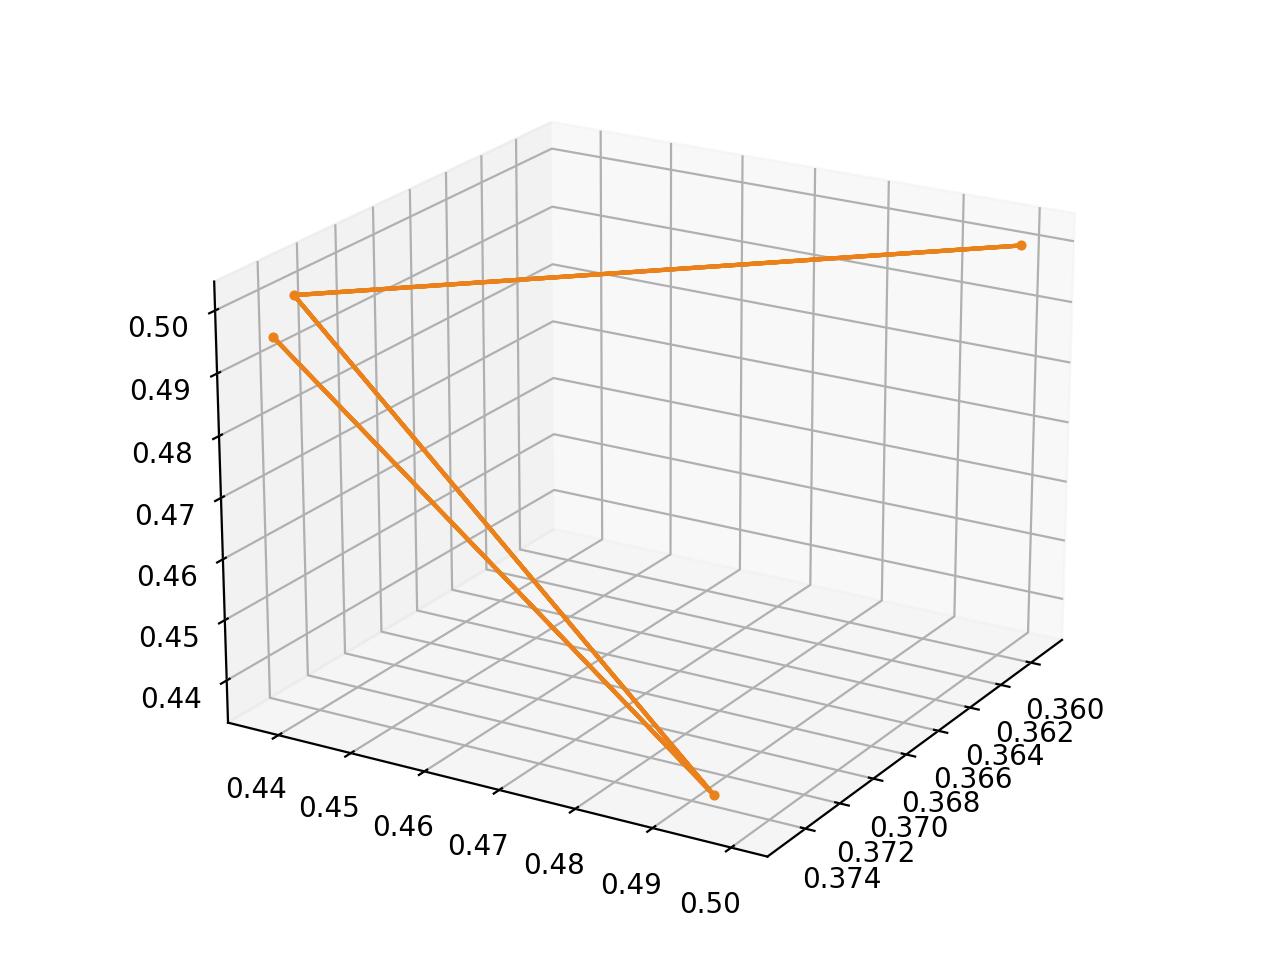

In [16]:
%matplotlib notebook

HC = Complex(3)
points = intersections[p]
HC.vf_to_vv(points, F_ijk)
HC.plot_complex()
plt.show()

<IPython.core.display.Javascript object>


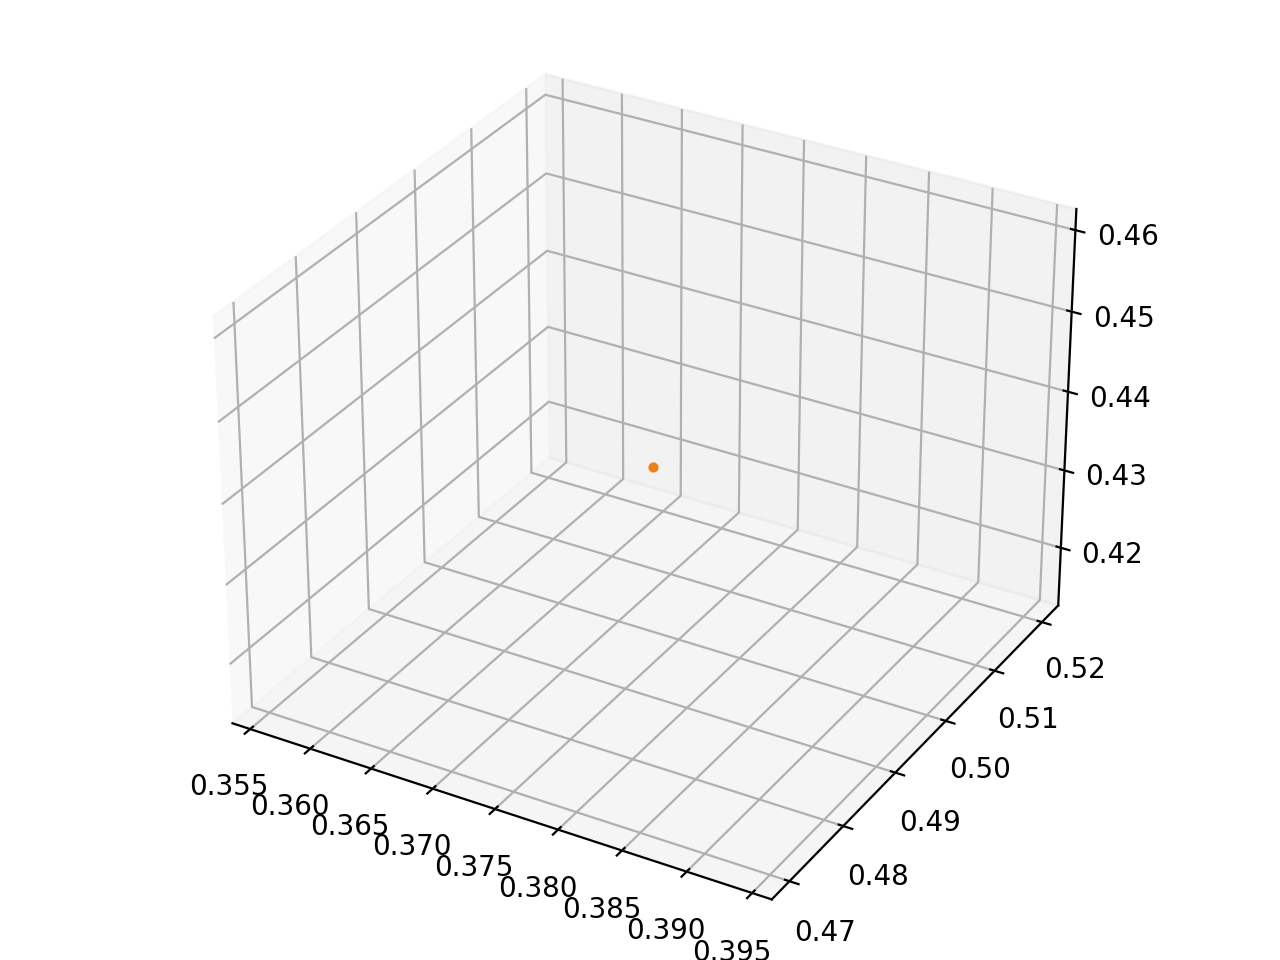

C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:3095: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if point_color is 'r':
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:3111: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if point_color is 'r':
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:2509: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (col is 'lo') or (col is 'do'):
C:\Users\stefa\loose\ddg\ddgclib\ddgclib\_complex.py:3095: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if

AttributeError: <class 'ddgclib._vertex.VertexScalarField'> object has no attribute 'f'

In [15]:
%matplotlib notebook
def t(x):
    return 0
HC = Complex(3, sfield=t)
HC.V.process_pools()
points = intersections[p]
HC.vf_to_vv(points, F_ijk)
axes = HC.plot_complex()
plt.show()

In [22]:
axes[0].show()

In [34]:
HC.V.print_out()

Vertex cache of size: 4:
Vertex: (0.375, 0.49514238659853893, 0.4375)
Connections: (0.375, 0.4375, 0.49514238659853893) (0.37388193871477254, 0.4375, 0.5) 
Vertex: (0.375, 0.4375, 0.49514238659853893)
Connections: (0.375, 0.49514238659853893, 0.4375) 
Vertex: (0.37388193871477254, 0.4375, 0.5)
Connections: (0.35906901088337206, 0.5, 0.5) (0.375, 0.49514238659853893, 0.4375) 
Vertex: (0.35906901088337206, 0.5, 0.5)
Connections: (0.37388193871477254, 0.4375, 0.5) 


In [ ]:
corners       = cell_corners_and_intersections[0]["Corners"]
intersections = cell_corners_and_intersections[0]["Intersections"]

#%matplotlib notebook
HC = Complex(3)
pind_list = assign_incides(intersections, corners)
#vp = HC.V[tuple(intersections[pind_list[0]])]
for i, vi in enumerate(intersections):
    v = HC.V[tuple(intersections[vi])]
    
for vi in pind_list[1:]:
    v = HC.V[tuple(intersections[vi])]
    v.connect(vp)
    vp = v
HC.plot_complex()
plt.show()

In [83]:
HC.V.print_out()

Vertex cache of size: 2:
Vertex: (0.375, 0.43577986660211937, 0.5)
Connections: (0.37388193871477254, 0.4375, 0.5) 
Vertex: (0.37388193871477254, 0.4375, 0.5)
Connections: (0.375, 0.43577986660211937, 0.5) 


In [12]:
corners[0], corners[6]

(array([0.3125, 0.375 , 0.4375]), array([0.375 , 0.4375, 0.5   ]))

In [51]:
corners, intersections

(array([[0.3125, 0.375 , 0.4375],
        [0.375 , 0.375 , 0.4375],
        [0.375 , 0.4375, 0.4375],
        [0.3125, 0.4375, 0.4375],
        [0.3125, 0.375 , 0.5   ],
        [0.375 , 0.375 , 0.5   ],
        [0.375 , 0.4375, 0.5   ],
        [0.3125, 0.4375, 0.5   ]]),
 array([[0.375     , 0.43577987, 0.5       ],
        [0.37388194, 0.4375    , 0.5       ],
        [0.375     , 0.4375    , 0.49514239]]))

In [71]:
X = []
HC = Complex(3)

c = cell_corners_and_intersections[3]
#if index % 25 == 0 or index == len(cell_corners_and_intersections) - 1:
# Extract data
corners       = c["Corners"]
intersections = c["Intersections"]
number_of_inter = len(intersections)
for idx in range(0, number_of_inter):
  # cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
   #vc = HC.V[tuple(cm)]
   this_inter       = intersections[idx]
   this_inter_faces = find_cell_faces(this_inter, corners)
   print(f'this_inter = {this_inter}')
   print(f'this_inter_faces = {this_inter_faces}')
   for nxt_idx in range(idx+1, number_of_inter):
      next_inter       = intersections[nxt_idx]
      next_inter_faces = find_cell_faces(next_inter, corners)
      print(f'next_inter_faces = {next_inter_faces}')
      print(f'this_inter_faces.intersection(next_inter_faces) = {this_inter_faces.intersection(next_inter_faces)}')
      if len(this_inter_faces.intersection(next_inter_faces)) > 0:
         v1 = HC.V[tuple(this_inter)]
         v2 = HC.V[tuple(next_inter)]
         v1.connect(v2)
        
HC.plot_complex()

all_sides = [None, 1, None, None, 4, None]
this_inter = [0.375      0.49514239 0.4375    ]
this_inter_faces = [1, 4]
all_sides = [None, None, None, 3, 4, None]
next_inter_faces = [3, 4]


AttributeError: 'list' object has no attribute 'intersection'

# Pseudo-triangulation algorithm


In [38]:
#intersections, corners, plot_thick):
#if 1:
X = []
HC = Complex(3)

for index, c in enumerate(cell_corners_and_intersections):
    #if index % 25 == 0 or index == len(cell_corners_and_intersections) - 1:
    # Extract data
    corners       = c["Corners"]
    intersections = c["Intersections"]
    number_of_inter = len(intersections)
    for idx in range(0, number_of_inter):
      # cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
       #vc = HC.V[tuple(cm)]
       this_inter       = intersections[idx]
       this_inter_faces = find_cell_faces(this_inter, corners)
       for nxt_idx in range(idx+1, number_of_inter):
          next_inter       = intersections[nxt_idx]
          next_inter_faces = find_cell_faces(next_inter, corners)
          if len(this_inter_faces.intersection(next_inter_faces)) > 0:
             v1 = HC.V[tuple(this_inter)]
             v2 = HC.V[tuple( next_inter)]
             v1.connect(v2)
           # v1.connect(vc)
           #  v2.connect(vc)
            #axes.plot( [this_inter[0], next_inter[0]], 
            #          [this_inter[1], next_inter[1]], 
            #          [this_inter[2], next_inter[2]], 
            #          marker="x", markersize=0.25, linewidth=0.25, color = "red")


AttributeError: 'list' object has no attribute 'intersection'

<IPython.core.display.Javascript object>


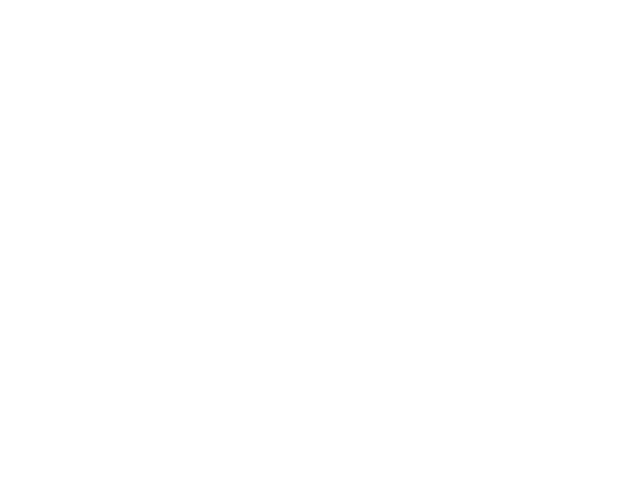

(<Figure size 640x480 with 0 Axes>, <Axes3D: >, None, None)

In [39]:
%matplotlib notebook
HC.plot_complex()

<IPython.core.display.Javascript object>


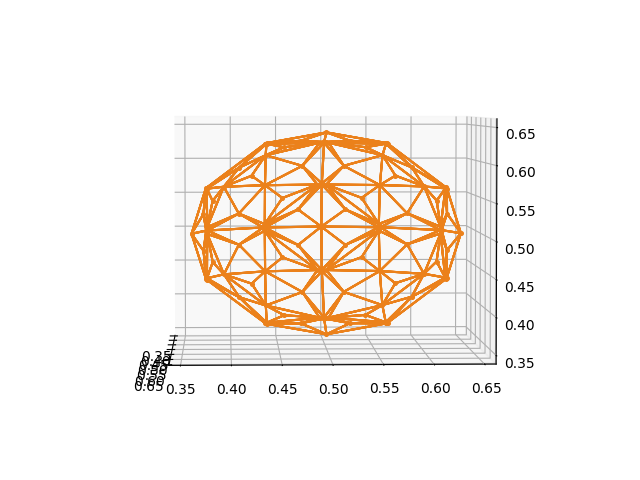

(0.35, 0.65)

In [87]:
%matplotlib notebook
X = np.array(X)
hcv = copy.copy(HC.V)
for v in hcv:
    if v.x_a[0] > 0.5:
        HC.V.remove(v)

fig, axes, _, _ = HC.plot_complex()
axes.axes.set_xlim3d(left=0.35, right=0.65)

In [84]:
HC.V.size()

137

In [63]:
HC.V.merge_all(1e-8)
HC.V.size()

137

# Attempt 2:


In [1]:
def HC_curvatures_sessile(HC, bV, r, theta_p, printout=False):
    R = r / np.cos(theta_p)
    K_f = (1 / R) ** 2
    H_f = 2 / R  # 2 / R
    HNdA_ij = []
    HNdA_i = []
    HN_i = []
    C_ij = []
    K_H_i = []
    HNdA_i_Cij = []
    Theta_i = []

    N_i = []  # Temp cap rise normal

    HNdA_i_cache = {}
    HN_i_cache = {}
    C_ij_cache = {}
    K_H_i_cache = {}
    HNdA_i_Cij_cache = {}
    Theta_i_cache = {}

    for v in HC.V:
        #TODO: REMOVE UNDER NORMAL CONDITIONS:
        if 0:
            if v in bV:
                continue
        N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
        N_f0 = normalized(N_f0)[0]
        N_i.append(N_f0)
        F, nn = vectorise_vnn(v)
        # Compute discrete curvatures
        c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
        # Append lists
        HNdA_ij.append(c_outd['HNdA_ij'])
        HNdA_i.append(c_outd['HNdA_i'])
        #HNdA_ij_dot.append(np.sum(np.dot(c_outd['HNdA_ij'], c_outd['n_i'])))
        HN_i.append(c_outd['HN_i'])
        C_ij.append(c_outd['C_ij'])
        K_H_i.append(c_outd['K_H_i'])
        HNdA_i_Cij.append(c_outd['HNdA_ij_Cij'])
        Theta_i.append(c_outd['theta_i'])
        
        # CIT paper:
        if 0:
            c_outd2 = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            HN_i_2.append(c_outd2['HN_i'])
            HNdA_i_list.append(c_outd2['HNdA_i'])
            C_ij_i_list.append(c_outd2['C_ij'])

        # Append chace
        HNdA_i_cache[v.x] = c_outd['HNdA_i']
        HN_i_cache[v.x] = c_outd['HN_i']
        C_ij_cache[v.x] = c_outd['C_ij']
        K_H_i_cache[v.x] = c_outd['K_H_i']
        HNdA_i_Cij_cache[v.x] = c_outd['HNdA_ij_Cij']
        Theta_i_cache[v.x] = c_outd['theta_i']

    if printout:
        print('.')
        print(f'HNdA_ij = {HNdA_ij}')
        print(f'HN_i = {HN_i}')
        print(f'C_ij = {C_ij}')
        print(f'K_H_i = {K_H_i}')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')
        print(f'Theta_i= {Theta_i}')
        print(f'np.array(Theta_i) in deg = {np.array(Theta_i) *180/np.pi}')
        print(f'np.array(Theta_i)/np.pi= {np.array(Theta_i) / np.pi}')
        rati = 2 * np.pi /np.array(Theta_i)
        rati = 2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  2 * np.pi / (2 * np.pi - np.array(Theta_i))
        rati =  (np.pi - np.array(Theta_i)/ 2 * np.pi )
        print(f' rati = { rati}')
        print(f'HNdA_i[1] * rati[1]  = {HNdA_ij[1] * rati[1] }')
        print(f'C_ij   = {C_ij }')
        print('.')
        print(f'HNdA_i_Cij = {HNdA_i_Cij}')

        print('-')
        print('Errors:')
        print('-')

        print(f'K_H_i - K_f = {np.array(K_H_i) - K_f}')
        print(f'HN_i  - H_f = {HN_i - H_f}')
        print(f'HNdA_i_Cij  - H_f = {HNdA_i_Cij - H_f}')

        #print(f'np.sum(C_ij) = {np.sum(C_ij)}')

    return (HNdA_i, HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache)


In [2]:
r = 1 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

NameError: name 'np' is not defined

In [70]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNda_v_cache, K_H_cache, C_ijk_v_cache, HN_i,  HNdA_ij_dot_hnda_i,
 K_H_2, HNdA_i_Cij) = int_curvatures(HC, bV, r, theta_p, printout=0)

In [71]:
HNda_v_cache

{(0.3746273129049242,
  0.43692662220070644,
  0.4983807955328463): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.00204199, -0.00628319,  0.00887179],
        [ 0.00204199,  0.0031416 , -0.01774358],
        [-0.00408398,  0.0031416 ,  0.00887179]], dtype=float128),
 (0.375,
  0.43577986660211937,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.01657331,  0.0468026 ],
        [-0.00315669,  0.00485655,  0.        ],
        [-0.08104135,  0.08104135, -0.        ],
        [-0.00204199,  0.00628319, -0.00887179],
        [ 0.0583166 , -0.04617896,  0.03860144],
        [-0.        , -0.00271788,  0.00767523],
        [ 0.0583166 , -0.04617896, -0.03860144],
        [-0.00204199,  0.00628319,  0.00887179]], dtype=float128),
 (0.37388193871477254,
  0.4375,
  0.5): array([[ 0.        ,  0.        ,  0.        ],
        [-0.00132579,  0.01925335,  0.01368901],
        [ 0.01165548,  0.        ,  0.05063927],
        [ 0.00528058, -0.0222803 ,

# Comparison with analytical solution

The sphere has a radius of $r = 0.15$ m and therefore a point-wise mean ("fluid mean") curvature of $H = \frac{2}{r}$  and an area of $A = 4\pi r^2$

$$ \int H N dA = \frac{2}{r} \cdot 4\pi r^2 = 8 \pi r  $$

In [72]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([-0.0198687 , -0.13366648,  0.01698527], dtype=float128),
 3.7699111843077515998)

In [74]:
np.sum(HNdA_ij), 8*np.pi*r 

(-0.13654991860508163681, 3.7699111843077515998)

# Check comparison with Qhull


In [71]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)

In [72]:
import scipy.spatial 
tri = scipy.spatial.Delaunay(X)

In [69]:
HC.vf_to_vv(tri.points, tri.simplices)


<IPython.core.display.Javascript object>


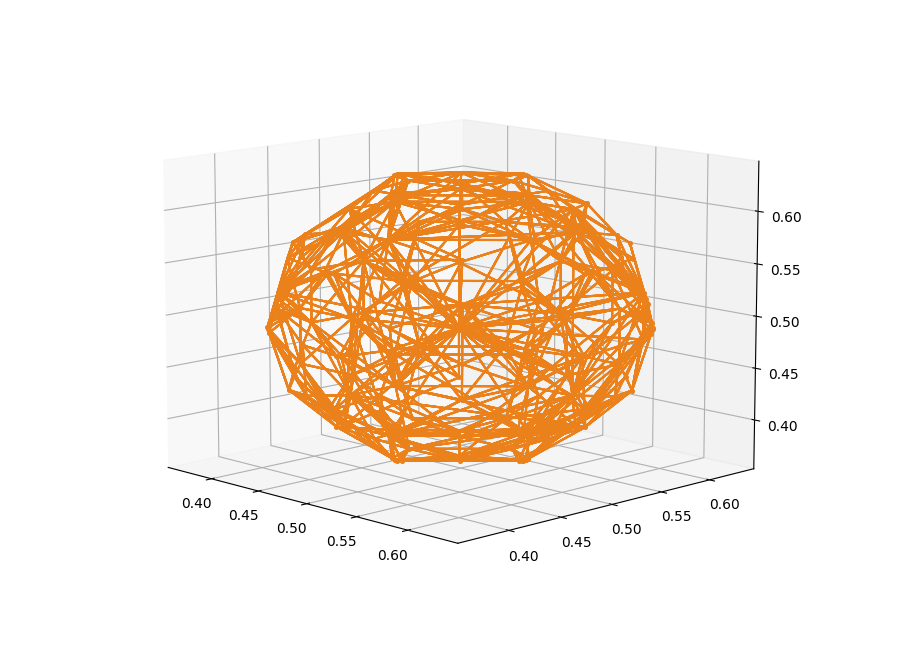

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [70]:
HC.plot_complex()

<IPython.core.display.Javascript object>


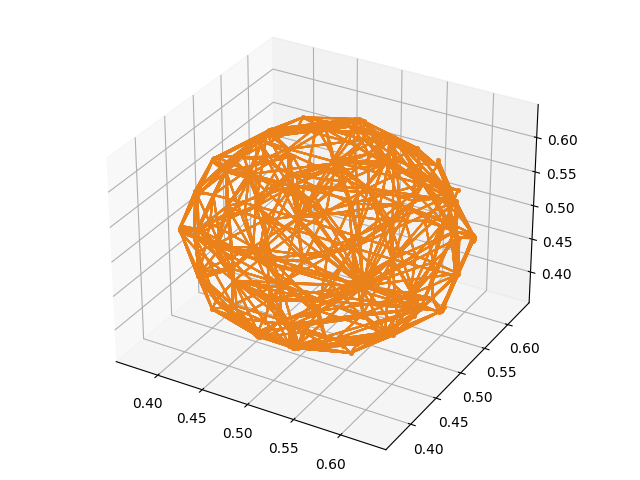

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [81]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
HC.plot_complex()

In [82]:
r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
HNdA_ij

[array([-0.01165546, -0.05646804,  0.06784001], dtype=float128),
 array([ 0.03550947, -0.00804893, -0.01065854], dtype=float128),
 array([0.04413185, 0.00666992, 0.0468586 ], dtype=float128),
 array([ 0.00444636,  0.03005626, -0.02326132], dtype=float128),
 array([0.02455148, 0.05134485, 0.18617584], dtype=float128),
 array([ 0.06090982, -0.33328692,  0.26242929], dtype=float128),
 array([-0.00841148, -0.01163959,  0.02324165], dtype=float128),
 array([-0.05369451, -0.05761486,  0.04544702], dtype=float128),
 array([0.26513964, 0.26618788, 0.26981843], dtype=float128),
 array([0.00926037, 0.0764498 , 0.00974177], dtype=float128),
 array([0.00386836, 0.01662044, 0.00663776], dtype=float128),
 array([-0.00898072,  0.04692888, -0.07397779], dtype=float128),
 array([-0.03028598,  0.00142382, -0.02903525], dtype=float128),
 array([-0.02516946, -0.00212308, -0.01205039], dtype=float128),
 array([-0.00666992,  0.04413185,  0.0468586 ], dtype=float128),
 array([ 0.0856931 , -0.00762709, -0.042

In [83]:
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([0.72715232, 0.7022318 , 0.19806352], dtype=float128),
 3.7699111843077515998)

In [85]:
np.sum(HNdA_ij), 4*np.pi*r

(1.6274476395681572159, 1.8849555921538757999)

# QHull without centroids

In [78]:
import scipy.spatial 
X = []
HC = Complex(3)
for c in corners_and_intersections:
    cm = np.sum(c['Intersections'], axis=0) / c['Intersections'].shape[0]
    X.append(cm)
    for xi in c['Intersections']:
        X.append(xi)
X = np.array(X)
tri = scipy.spatial.Delaunay(X)
dV = HC.boundary_d(HC.V)
HC.vf_to_vv(tri.points, tri.simplices)
#HC.plot_complex()

r = 0.15 # Radius of the tube (20 mm)
theta_p = 20 * np.pi/180.0  # Three phase contact angle
r = np.array(r, dtype=np.longdouble)
bV = set([])

(HNdA_ij, HN_i, C_ij, K_H_i, HNdA_i_Cij, Theta_i,
            HNdA_i_cache, HN_i_cache, C_ij_cache, K_H_i_cache, HNdA_i_Cij_cache,
            Theta_i_cache) = HC_curvatures_sessile(HC, bV, r, theta_p, printout=0)
np.sum(HNdA_ij, axis=0), 8*np.pi*r

(array([0.72715232, 0.7022318 , 0.19806352], dtype=float128),
 3.7699111843077515998)

In [79]:
np.sum(HNdA_ij), 4*np.pi*r

(1.6274476395681572159, 1.8849555921538757999)

In [80]:
np.linalg.norm(HNdA_ij), 4*np.pi*r 

(2.1004153601880431112, 1.8849555921538757999)

In [88]:
HC.V.size()

137

In [89]:
HC.V.merge_all(1e-8)
HC.V.size()

137